# Computer Vision

Một số bài toán phổ biến trong thị giác máy tính:
1. Phân loại ảnh
2. Phát hiện vật
3. Phân vùng ảnh
4. Tạo ảnh

Trong các bài toán thị giác máy tính, mạng CNN là một trong những mạng phổ biến nhất vì nó hoạt động tốt nhất trên dữ liệu ảnh

Dữ liệu ảnh thường bao gồm 4 chiều dữ liệu như sau:
1. Batch_size: số lượng ảnh trong 1 batch
2. Colour_channels: số kênh màu (thường là 3 - rgb hoặc 1 - ảnh xám)
3. Height: độ cao ảnh
4. Width: độ rộng ảnh

Pytorch thường yêu cầu ảnh đầu vào được sắp xếp chiều theo thứ tự batch_size -> colour_channels -> height -> width


## 1. Torchvision

Tham khảo: https://pytorch.org/vision/stable/index.html

Torchvision là một thư viện quan trong của Pytorch liên quan đến các bấn đề thị giác máy tính. Một số thành phần trong torchvision:
- 'torchvision.datasets' các hàm để lấy dữ liệu và load data
- 'torchvision.models' các mô hình pretrained có thể sử dụng
- 'torchvision.transforms' các hàm nhằm tinh chỉnh dữ liệu cho phù hợp với mô hình
- 'torch.utils.data.Dataset' một class cho việc cài đặt và xử lý bộ dữ liệu
- 'torch.utils.data.Dataloader' Tạo một python iterable từ một dataset

In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torch import nn

from matplotlib import pyplot as plt

## 2. Getting a dataset

In [2]:
train_data = datasets.FashionMNIST(
    root='data',  # vị trí tải dataset về
    train=True,   # loại dữ liệu muốn tải về (train hay test)
    download=True,  # có muốn tải về không?
    transform=ToTensor(), # muốn dữ liệu được lấy về dưới dạng nào
    target_transform=None # nhãn được lưu dưới dạng như thế nào
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)



100%|██████████| 26.4M/26.4M [00:01<00:00, 14.0MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 309kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.42MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 24.2MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

Text(0.5, 1.0, 'Ankle boot')

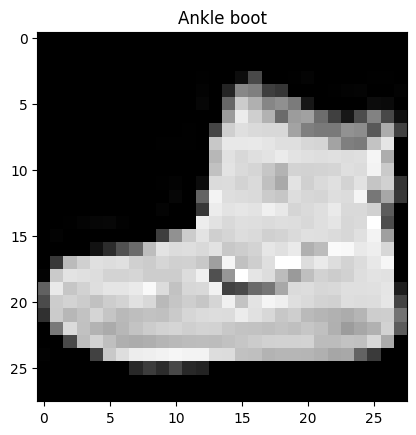

In [7]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])

## 3. Dataloader

Trong pytorch, dataloader là công cụ giúp chuyển dữ liệu thành các batch nhỏ

In [8]:
train_dataloader = torch.utils.data.DataLoader(
    dataset=train_data,
    batch_size=64,
    shuffle=True
)

test_dataloader = torch.utils.data.DataLoader(
    dataset=test_data,
    batch_size=64,
    shuffle=False
)

Text(0.5, 1.0, 'Ankle boot')

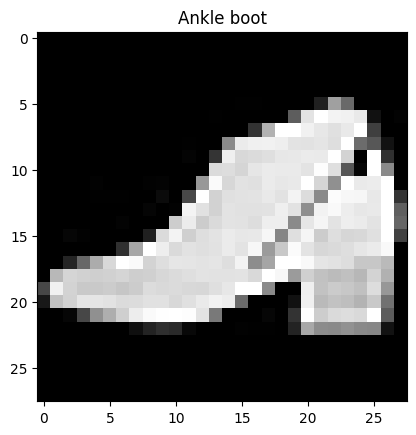

In [9]:
torch.manual_seed(42)

train_features, train_labels = next(iter(train_dataloader))

random_idx = torch.randint(0, len(train_features), size=[1]).item()
img, label = train_features[random_idx], train_labels[random_idx]

plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])


## 4. Building model

### Flatten layer

In [10]:
flatten_layer = nn.Flatten()
x = train_features[0]
print(x.shape)
output = flatten_layer(x)
print(output.shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])


### Mô hình cơ bản

In [11]:
class FashionMNISTModel(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )
  def forward(self, x):
    return self.layers(x)

class FashionMNISTModel1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )
  def forward(self, x):
    return self.layers(x)

In [12]:
model = FashionMNISTModel(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
)

model

FashionMNISTModel(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

## 5. Training

In [13]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [14]:
from tqdm.auto import tqdm

torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

epochs = 100

for epoch in tqdm(range(epochs)):
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model.train()
        y_logits = model(X)
        loss = loss_fn(y_logits, y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= len(train_dataloader)

    if epoch % 10 == 0:
        test_loss, test_acc = 0, 0
        model.eval()
        with torch.inference_mode():
            for X, y in test_dataloader:
                test_logits = model(X)
                test_loss += loss_fn(test_logits, y)
                test_acc += accuracy_fn(y, test_logits.argmax(dim=1))
            test_loss /= len(test_dataloader)
            test_acc /= len(test_dataloader)
        print(f'Epoch: {epoch} | Loss: {train_loss} | Test loss: {test_loss} | Test accuracy: {test_acc}')


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.6372385025024414 | Test loss: 0.544655978679657 | Test accuracy: 80.75238853503184
Epoch: 10 | Loss: 0.4096410572528839 | Test loss: 0.4652539789676666 | Test accuracy: 83.4892515923567
Epoch: 20 | Loss: 0.3933369517326355 | Test loss: 0.4712640047073364 | Test accuracy: 82.86226114649682
Epoch: 30 | Loss: 0.38506513833999634 | Test loss: 0.4883391261100769 | Test accuracy: 83.0812101910828
Epoch: 40 | Loss: 0.3798218369483948 | Test loss: 0.48311251401901245 | Test accuracy: 83.3499203821656
Epoch: 50 | Loss: 0.37582719326019287 | Test loss: 0.4557112753391266 | Test accuracy: 83.93710191082802
Epoch: 60 | Loss: 0.3724995255470276 | Test loss: 0.4497359097003937 | Test accuracy: 84.11624203821655
Epoch: 70 | Loss: 0.37051278352737427 | Test loss: 0.4694346487522125 | Test accuracy: 83.88734076433121
Epoch: 80 | Loss: 0.37003082036972046 | Test loss: 0.4652653634548187 | Test accuracy: 83.66839171974522
Epoch: 90 | Loss: 0.368356317281723 | Test loss: 0.4751349389553

In [15]:
def eval_model(model: nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: nn.Module):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            test_logits = model(X)
            loss += loss_fn(test_logits, y)
            acc += accuracy_fn(y, test_logits.argmax(dim=1))
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}


In [16]:
result = eval_model(model=model, data_loader=test_dataloader, loss_fn=loss_fn)
result

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.47373300790786743,
 'model_acc': 83.6484872611465}

In [17]:
model1 = FashionMNISTModel1(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model1.parameters(), lr=0.1)

epochs = 100

for epoch in tqdm(range(epochs)):
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model1.train()
        y_logits = model1(X)
        loss = loss_fn(y_logits, y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= len(train_dataloader)

    if epoch % 10 == 0:
        test_loss, test_acc = 0, 0
        model1.eval()
        with torch.inference_mode():
            for X, y in test_dataloader:
                test_logits = model1(X)
                test_loss += loss_fn(test_logits, y)
                test_acc += accuracy_fn(y, test_logits.argmax(dim=1))
            test_loss /= len(test_dataloader)
            test_acc /= len(test_dataloader)
        print(f'Epoch: {epoch} | Loss: {train_loss} | Test loss: {test_loss} | Test accuracy: {test_acc}')

result1 = eval_model(model=model1, data_loader=test_dataloader, loss_fn=loss_fn)
result1

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.6927283406257629 | Test loss: 0.5357022285461426 | Test accuracy: 80.99124203821655
Epoch: 10 | Loss: 0.39519065618515015 | Test loss: 0.48566746711730957 | Test accuracy: 83.06130573248407
Epoch: 20 | Loss: 0.3684540092945099 | Test loss: 0.4445342421531677 | Test accuracy: 83.67834394904459
Epoch: 30 | Loss: 0.3524642288684845 | Test loss: 0.4246557950973511 | Test accuracy: 84.87261146496816
Epoch: 40 | Loss: 0.3426545560359955 | Test loss: 0.4585546553134918 | Test accuracy: 84.19585987261146
Epoch: 50 | Loss: 0.33479034900665283 | Test loss: 0.43885594606399536 | Test accuracy: 84.61385350318471
Epoch: 60 | Loss: 0.32890477776527405 | Test loss: 0.42198020219802856 | Test accuracy: 85.25079617834395
Epoch: 70 | Loss: 0.323527991771698 | Test loss: 0.4394654631614685 | Test accuracy: 84.74323248407643
Epoch: 80 | Loss: 0.3216777443885803 | Test loss: 0.44288280606269836 | Test accuracy: 84.78304140127389
Epoch: 90 | Loss: 0.3178907036781311 | Test loss: 0.4589802

{'model_name': 'FashionMNISTModel1',
 'model_loss': 0.45047274231910706,
 'model_acc': 84.82285031847134}

## 6. Mạng CNN

Một mạng CNN thường sẽ có 2 loại lớp phổ biến là lớp Convolution và lớp pooling. Lớp Convolution có tác dụng trích chọn các đặc trưng từ ảnh bằng cách thực hiện các phép tích chập, trong khi đó lớp pooling có tác dụng giảm số đặc trưng của dữ liệu

In [21]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

class CNNmodel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
        )

    def forward(self, x):
        return self.classifier(self.conv_block_2(self.conv_block_1(x)))

model = CNNmodel(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)
model

CNNmodel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [23]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Chuyển dữ liệu sang GPU
        X, y = X.to(device), y.to(device)

        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1)
            )

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [24]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.1)
epochs = 100

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
               model=model,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)

    test_step(data_loader=test_dataloader,
              model=model,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)




Train loss: 0.64593 | Train accuracy: 77.23%
Test loss: 0.67543 | Test accuracy: 76.83%

Epoch: 97
---------
Train loss: 0.64475 | Train accuracy: 77.01%
Test loss: 0.61962 | Test accuracy: 78.63%

Epoch: 98
---------
Train loss: 0.64732 | Train accuracy: 77.04%
Test loss: 0.63930 | Test accuracy: 77.35%

Epoch: 99
---------
Train loss: 0.64096 | Train accuracy: 77.20%
Test loss: 0.66162 | Test accuracy: 77.33%



In [27]:
model_results = eval_model(model=model.to('cpu'), data_loader=test_dataloader, loss_fn=loss_fn)
model_results

{'model_name': 'CNNmodel',
 'model_loss': 0.6616196036338806,
 'model_acc': 77.32882165605096}